In [18]:
import pickle
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np 
import pandas as pd
import re
from word2number import w2n
from sklearn.metrics import mean_absolute_error

In [ ]:
pip install word2number

In [237]:
#Read the preprocessed data

In [238]:
# with open('./data_for_tree.pkl', 'rb') as f:
#     data = pickle.load(f)

In [96]:
data = pd.read_csv('./Data/CarPrice_Assignment.csv')

In [22]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [12]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
data.skew().sort_values()

stroke             -0.689705
car_ID              0.000000
boreratio           0.020156
carheight           0.063123
peakrpm             0.075159
carlength           0.155954
symboling           0.211072
highwaympg          0.539997
citympg             0.663704
curbweight          0.681398
carwidth            0.904003
wheelbase           1.050214
horsepower          1.405310
price               1.777678
enginesize          1.947655
compressionratio    2.610862
dtype: float64

In [88]:
data = pd.get_dummies(data, columns = ['carbody', 'drivewheel', 'enginetype','fuelsystem', 'enginelocation', 'fueltype'])

In [89]:
def num_encoder(x):
    return w2n.word_to_num(x)


data['doornumber'] = data['doornumber'].map(lambda x: w2n.word_to_num(x))
data['cylindernumber'] = data['cylindernumber'].map(lambda x:w2n.word_to_num(x))

In [90]:
numeric_features = ['price','wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']
scaler = StandardScaler()
for col in numeric_features:
    data[col] = scaler.fit_transform(data[[col]])

In [91]:
data.skew().sort_values()

enginelocation_front    -8.143531
fueltype_gas            -2.732619
enginetype_ohc          -0.998089
stroke                  -0.689705
drivewheel_fwd          -0.349111
doornumber              -0.247552
car_ID                   0.000000
boreratio                0.020156
carheight                0.063123
peakrpm                  0.075159
carbody_sedan            0.128024
carlength                0.155954
fuelsystem_mpfi          0.167656
symboling                0.211072
drivewheel_rwd           0.539225
highwaympg               0.539997
citympg                  0.663704
carbody_hatchback        0.673587
curbweight               0.681398
fuelsystem_2bbl          0.767785
carwidth                 0.904003
wheelbase                1.050214
horsepower               1.405310
price                    1.777678
enginesize               1.947655
carbody_wagon            2.327670
compressionratio         2.610862
fueltype_diesel          2.732619
fuelsystem_idi           2.732619
cylindernumber

In [92]:
data['CarName_first'] = data['CarName'].map(lambda x: re.split(r'\s|-', x)[0])

In [93]:
data = data.loc[:, ~data.columns.isin(['car_ID', 'CarName', 'aspiration'])]

In [29]:
with open('./processed_data.pkl', 'wb') as f:
    pickle.dump(data, f)

In [94]:
test_data = data.groupby('CarName_first').head(6)


In [95]:
indexes = ~data.index.isin(test_data.index)
train_data = data.loc[indexes]
train_data.columns

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'enginelocation_front', 'enginelocation_rear',
       'fueltype_diesel', 'fueltype_gas', 'CarName_first'],
      dtype='object')

In [45]:
y_train = train_data['price']
y_test = test_data['price']

In [46]:
X_train = train_data.loc[:, ~train_data.columns.isin(['CarName_first', 'price' ])]

In [47]:
X_test = test_data.loc[:, ~test_data.columns.isin(['CarName_first', 'price'])]

In [48]:
X_train

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,enginelocation_front,enginelocation_rear,fueltype_diesel,fueltype_gas
9,0,2,0.123757,0.337262,0.930947,-0.707626,0.957693,5,0.098522,-0.739338,...,0,0,0,1,0,0,1,0,0,1
16,0,2,0.789639,1.604816,0.930947,-0.010206,1.587255,6,1.976184,1.074252,...,0,0,0,1,0,0,1,0,0,1
17,0,4,1.871697,1.864827,2.332839,1.056437,1.827913,6,1.976184,1.074252,...,0,0,0,1,0,0,1,0,0,1
27,1,2,-0.841772,-1.360937,-0.984972,-1.281972,-0.701886,4,-0.695874,-1.109459,...,0,0,0,1,0,0,1,0,0,1
28,-1,4,0.756344,0.044749,-0.611134,2.492302,-0.039595,4,-0.118132,0.037915,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4,1.721873,1.198549,1.398245,0.728239,0.763241,4,0.339248,1.666445,...,0,0,0,1,0,0,1,0,0,1
201,-1,4,1.721873,1.198549,1.351515,0.728239,0.949992,4,0.339248,1.666445,...,0,0,0,1,0,0,1,0,0,1
202,-1,4,1.721873,1.198549,1.398245,0.728239,0.878757,6,1.109571,0.926204,...,0,0,0,1,0,0,1,0,0,1
203,-1,4,1.721873,1.198549,1.398245,0.728239,1.273437,6,0.435538,-1.183483,...,0,1,0,0,0,0,1,0,1,0


In [49]:
reg = DecisionTreeRegressor(random_state=0).fit(X_train, y_train)

In [51]:
y_pred_train = reg.predict(X_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_train

0.005048080187357482

In [52]:
y_pred_test = reg.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
mae_test

0.37104297507146494

In [53]:
reg2 = MLPRegressor().fit(X_train, y_train)

In [54]:
y_pred_train = reg2.predict(X_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_train

0.07648746277768027

In [55]:
y_pred_test = reg2.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
mae_test

0.31541739927035745

# Linear Regression With Regularization

In [161]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [162]:
data = pd.read_csv('./Data/CarPrice_Assignment.csv')
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [163]:

data = pd.get_dummies(data, columns = ['symboling','doornumber','cylindernumber', 'carbody', 'drivewheel', 'enginetype','fuelsystem', 'enginelocation', 'fueltype'])
data['CarName_first'] = data['CarName'].map(lambda x: re.split(r'\s|-', x)[0])
data = data.loc[:, ~data.columns.isin(['car_ID', 'CarName', 'aspiration'])]



In [164]:
test_data = data.groupby('CarName_first').head(6)

indexes = ~data.index.isin(test_data.index)
train_data = data.loc[indexes]




In [165]:
numeric_features = ['price','wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']
scaler = MinMaxScaler()
for col in numeric_features:
    train_data[col] = scaler.fit_transform(train_data[[col]])
    test_data[col] = scaler.fit_transform(test_data[[col]])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [166]:
y_train = train_data['price']
y_test = test_data['price']

X_train = train_data.loc[:, ~train_data.columns.isin(['CarName_first', 'price' ])]
X_test = test_data.loc[:, ~test_data.columns.isin(['CarName_first', 'price'])]

In [154]:
# scaler = MinMaxScaler()
# for col in list(X_train.columns):
#     X_train[col] = scaler.fit_transform(X_train[[col]])
    
# for col in list(X_train.columns):
#     X_test[col] = scaler.fit_transform(X_test[[col]])
    
# y_train = scaler.fit_transform(y_train)
# y_test = scaler.fit_transform(y_test)

In [168]:
X_train.min()

wheelbase                0.0
carlength                0.0
carwidth                 0.0
carheight                0.0
curbweight               0.0
enginesize               0.0
boreratio                0.0
stroke                   0.0
compressionratio         0.0
horsepower               0.0
peakrpm                  0.0
citympg                  0.0
highwaympg               0.0
symboling_-2             0.0
symboling_-1             0.0
symboling_0              0.0
symboling_1              0.0
symboling_2              0.0
symboling_3              0.0
doornumber_four          0.0
doornumber_two           0.0
cylindernumber_eight     0.0
cylindernumber_five      0.0
cylindernumber_four      0.0
cylindernumber_six       0.0
cylindernumber_three     0.0
cylindernumber_twelve    0.0
cylindernumber_two       0.0
carbody_convertible      0.0
carbody_hardtop          0.0
carbody_hatchback        0.0
carbody_sedan            0.0
carbody_wagon            0.0
drivewheel_4wd           0.0
drivewheel_fwd

In [188]:
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred_train = reg.predict(X_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
print(mae_train)

y_pred_test = reg.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
print(mae_test)

0.03476348967672101
0.10699739510728873


In [170]:
len(reg.coef_)

55

In [171]:
def plot_errors(lambdas, train_errors, test_errors, title):
    plt.figure(figsize=(16, 9))
    plt.plot(lambdas, train_errors, label="train")
    plt.plot(lambdas, test_errors, label="test")
    plt.xlabel("$\\lambda$", fontsize=14)
    plt.ylabel("MSE", fontsize=14)
    plt.title(title, fontsize=20)
    plt.legend(fontsize=14)
    plt.show()

In [180]:
def evaluate_model(Model, lambdas):
    training_errors = []
    testing_errors = []
    for l in lambdas:
        model = Model(alpha = l, max_iter=1000)
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        mse_train = mean_squared_error(y_train, y_pred_train)
        training_errors.append(mse_train)
        
        y_pred_test = model.predict(X_test)
        mse_test = mean_squared_error(y_test, y_pred_test)
        testing_errors.append(mse_test)
        
    return training_errors, testing_errors


## Lasso Regularization ( L1)

100


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08737808770622203, tolerance: 0.0003143474897517699
  positive)


100 100


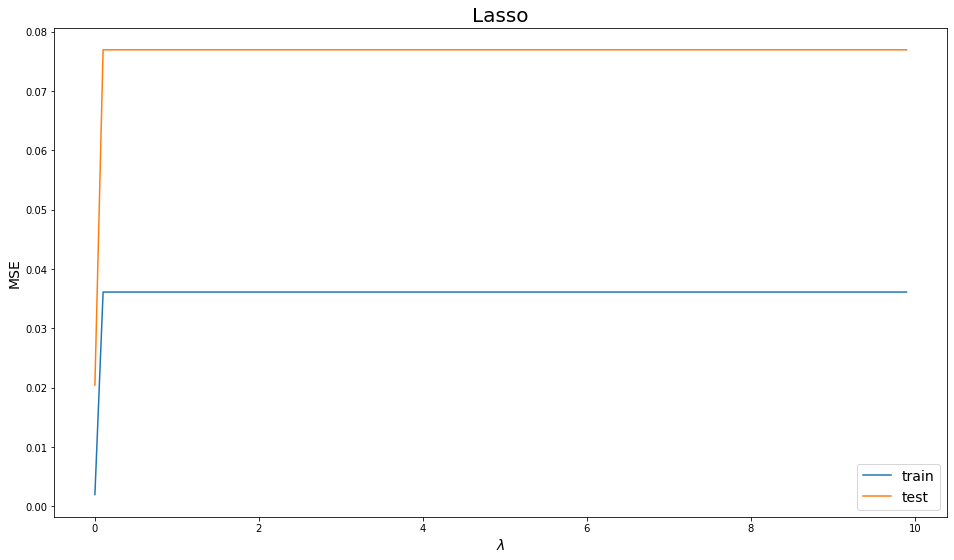

In [181]:
lambdas = np.arange(0, 10, step=0.1)
print(len(lambdas))
lasso_train, lasso_test = evaluate_model(Lasso, lambdas)
print(len(lasso_train), len(lasso_test))
plot_errors(lambdas, lasso_train, lasso_test, "Lasso")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08737808953208595, tolerance: 0.0003143474897517699
  positive)


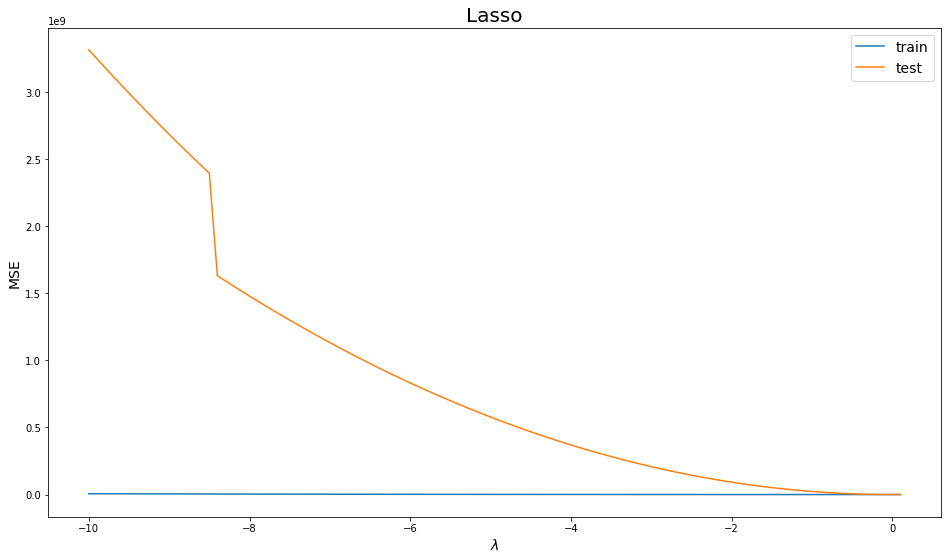

In [182]:
lambdas = np.arange(-10, 0.2, step=0.1)

lasso_train, lasso_test = evaluate_model(Lasso, lambdas)
plot_errors(lambdas, lasso_train, lasso_test, "Lasso")

## Ridge L2 Regularization

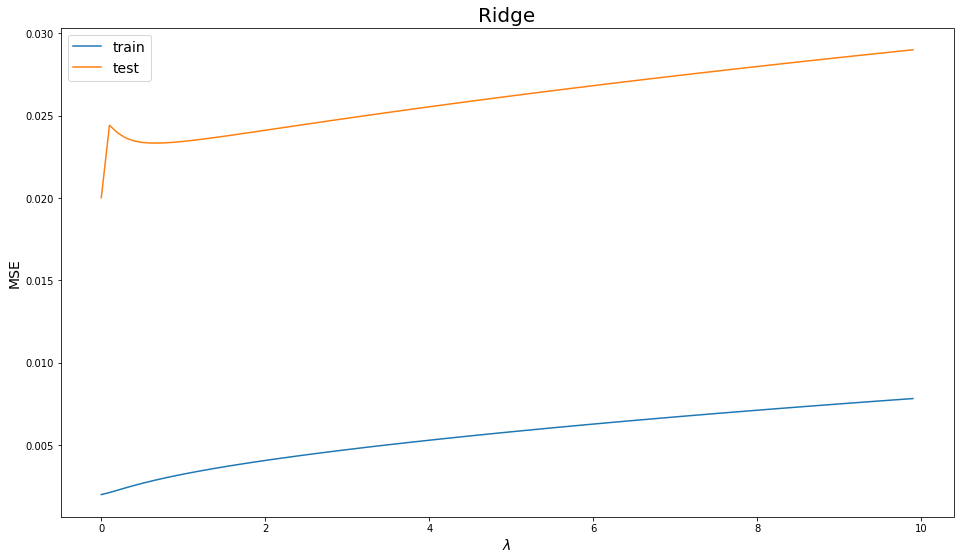

In [183]:
lambdas = np.arange(0, 10, step=0.1)

ridge_train, ridge_test = evaluate_model(Ridge, lambdas)
plot_errors(lambdas, ridge_train, ridge_test, "Ridge")

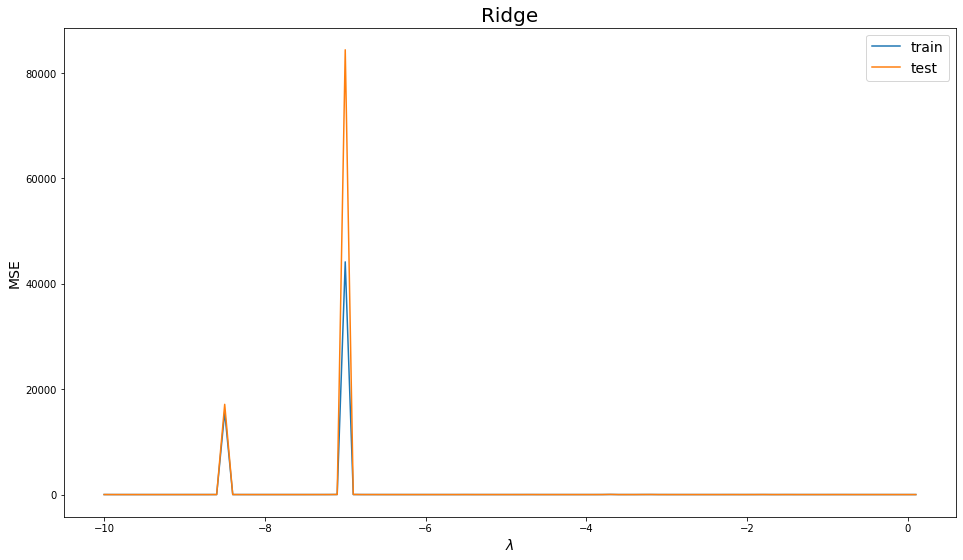

In [184]:
lambdas = np.arange(-10, 0.2, step=0.1)

ridge_train, ridge_test = evaluate_model(Ridge, lambdas)
plot_errors(lambdas, ridge_train, ridge_test, "Ridge")

# Elastic Net L3 Regularization

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08737808770622203, tolerance: 0.0003143474897517699
  positive)


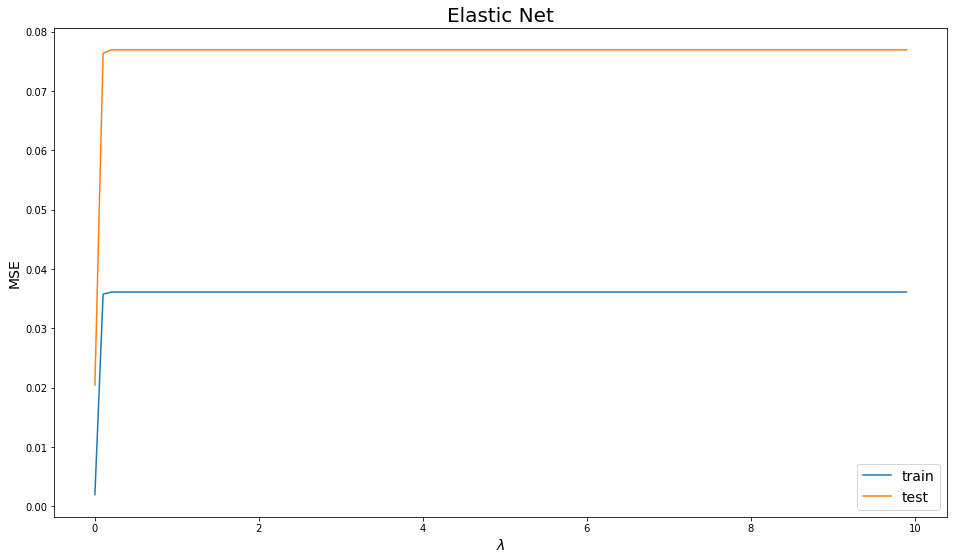

In [185]:
lambdas = np.arange(0, 10, step=0.1)

elastic_train, elastic_test = evaluate_model(ElasticNet, lambdas)
plot_errors(lambdas, elastic_train, elastic_test, "Elastic Net")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.951756103005943e+36, tolerance: 0.0003143474897517699
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.021171100838596e+135, tolerance: 0.0003143474897517699
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2726322600367107e+243, tolerance: 0.0003143474897517699
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the numb

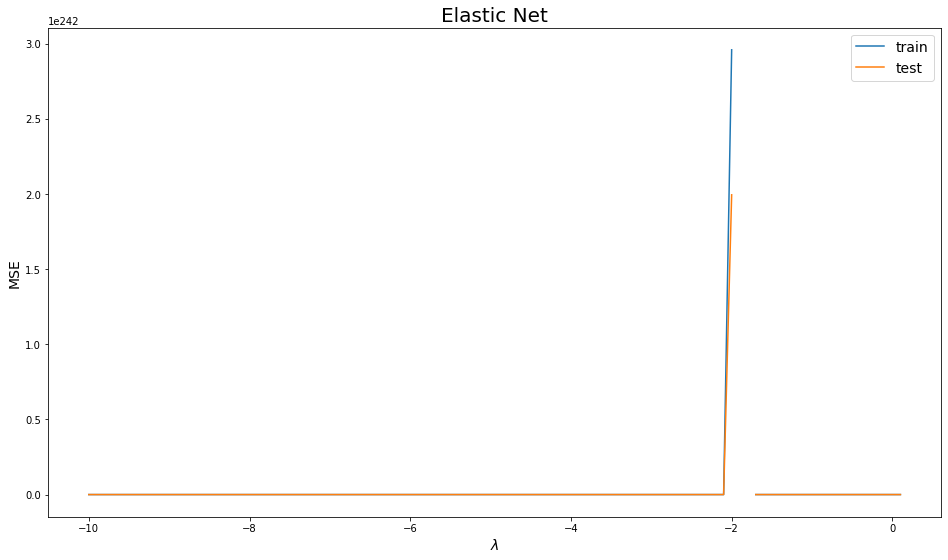

In [186]:
lambdas = np.arange(-10, 0.2, step=0.1)

elastic_train, elastic_test = evaluate_model(ElasticNet, lambdas)
plot_errors(lambdas, elastic_train, elastic_test, "Elastic Net")

In [179]:
help(Lasso)

Help on class Lasso in module sklearn.linear_model._coordinate_descent:

class Lasso(ElasticNet)
 |  Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
 |  
 |  Linear Model trained with L1 prior as regularizer (aka the Lasso)
 |  
 |  The optimization objective for Lasso is::
 |  
 |      (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
 |  
 |  Technically the Lasso model is optimizing the same objective function as
 |  the Elastic Net with ``l1_ratio=1.0`` (no L2 penalty).
 |  
 |  Read more in the :ref:`User Guide <lasso>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : float, optional
 |      Constant that multiplies the L1 term. Defaults to 1.0.
 |      ``alpha = 0`` is equivalent to an ordinary least square, solved
 |      by the :class:`LinearRegression` object. For numerical
 |      reasons, using ``alpha = 0`` with the ``Lasso`` object 